# Watch the Algorithm

SunFlow's algorithm building blocks are

- a graph compiler,
- a graph visualizer using modules from graphviz and 
- an optimizer using scipy, numpy, pandas and pprint modules.


# Backstage

To see the logic behind the algorithm you may use the display() method of class Net. By default its parameter is set to zero, but if you use instead a value of 1 or 2 you can get insights how the algorithm works.

In [1]:
globals().clear(); import aitpath; from sunflow import SupplyNet


net = SupplyNet('Supply Net Backstage').display(1).title(False)

supplier    = net.source()    
new_york    = net.distribution(supplier)
new_orleans = net.distribution(supplier)
customer    = net.delivery(new_york, new_orleans) .demand(80)
net.compile()
net.showGraph().view()
print()


List all Nodes
  endNodes      [s14]
  intermediates [s6, s10]
  terminals     [s2]
  allNodes      [s2, s6, s10, s14]

Flow equations of intermediate nodes
  m(s2,s6) - m(s6,s14)  = 0
  m(s2,s10) - m(s10,s14)  = 0

Flow equations of end nodes
  m(s6,s14) + m(s10,s14) = 80 : Demand(s14)

Capacities of intermediate nodes

Capacities of end nodes

Capacities of Terminals



This output isn't really neat. The names inside the boxes are SunFlow's internal node and vertex names which are not really readable.


<div>
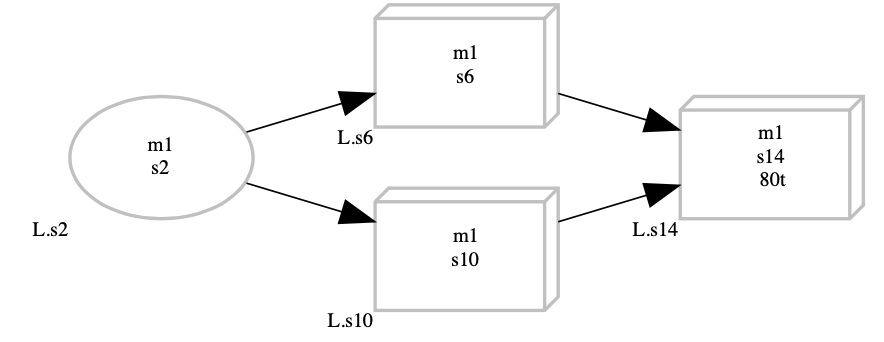
</div>

# Compiler

To increase the readability of a graph you can assign each net node with the n() method an individual textual identification. Here we've added as well capacity constraints and cost figures - the service charges of the distribution sites - to see the compiler working. By the way, end nodes doesn't usually have capacities, but they could.

In [2]:
net = SupplyNet('Supply Net Compiler').display(1).title(False)

supplier    = net.source()                       .n('SUP')  .capacity(200)
new_york    = net.distribution(supplier)         .n('NY')   .capacity(20)  .varcost(50)
new_orleans = net.distribution(supplier)         .n('NOR')  .capacity(100) .varcost(100)
customer    = net.delivery(new_york, new_orleans).n('CUST') .demand(80)
net.compile()
net.showGraph().view()


List all Nodes
  endNodes      [CUST]
  intermediates [NY, NOR]
  terminals     [SUP]
  allNodes      [SUP, NY, NOR, CUST]

Flow equations of intermediate nodes
  m(SUP,NY) - m(NY,CUST)  = 0
  m(SUP,NOR) - m(NOR,CUST)  = 0

Flow equations of end nodes
  m(NY,CUST) + m(NOR,CUST) = 80 : Demand(CUST)

Capacities of intermediate nodes
  m(NY,CUST) <= 20 : capacity(NY)
  m(NOR,CUST) <= 100 : capacity(NOR)

Capacities of end nodes

Capacities of Terminals
  m(SUP,NY) +  m(SUP,NOR)   <= 200 : capacity(SUP)



<div>
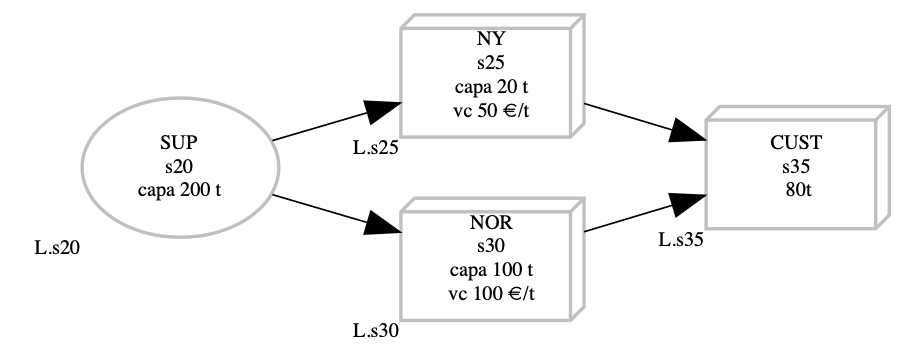
</div>

# The Math behind

The mathematical structure can be illustrated by using display(2) instead of display(1). With debug(1) in addition you will see as well SunFlow's variables and their connections between each other. 

In [3]:
net = SupplyNet('Supply Net Math').display(2).title(False).debug(1)

supplier    = net.source()                       .n('SUP')  .capacity(200)
new_york    = net.distribution(supplier)         .n('NY')   .capacity(20)    .varcost(50)
new_orleans = net.distribution(supplier)         .n('NOR')  .capacity(100)   .varcost(100)
customer    = net.delivery(new_york, new_orleans).n('CUST') .demand(80)
net.compile()


List all Nodes
  endNodes      [CUST]
  intermediates [NY, NOR]
  terminals     [SUP]
  allNodes      [SUP, NY, NOR, CUST]

Flow equations of intermediate nodes
  m(SUP,NY) - m(NY,CUST)  = 0
  m(SUP,NOR) - m(NOR,CUST)  = 0

Flow equations of end nodes
  m(NY,CUST) + m(NOR,CUST) = 80 : Demand(CUST)

Capacities of intermediate nodes
  m(NY,CUST) <= 20 : capacity(NY)
  m(NOR,CUST) <= 100 : capacity(NOR)

Capacities of end nodes

Capacities of Terminals
  m(SUP,NY) +  m(SUP,NOR)   <= 200 : capacity(SUP)

NodeLinks
  variable [  0] = (s41,s46)  |  s41 => s46   L.s41 -> L.s46 
  variable [  1] = (s41,s51)  |  s41 => s51   L.s41 -> L.s51 
  variable [  2] = (s46,s56)  |  s46 => s56   L.s46 -> L.s56 
  variable [  3] = (s51,s56)  |  s51 => s56   L.s51 -> L.s56 

Optimization Parameters:
Flow Constraints =  3 equations with 4 variables
[[ 1.  0. -1.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  1.  1.]]
Flow Balance = [     0.0    0.0   80.0 ]

Upper limit constraints =  3 equations for 4 variables
[[0. 

# Optimizing

Once the net is compiled, you execute the optimizer by net.execute() which returns an instance of class Optimize which is used for graphics and provides the results of the optimization.

In [4]:
opt = net.execute()
opt.showGraph(flowOnly=False, orient='LR').view()


<div> 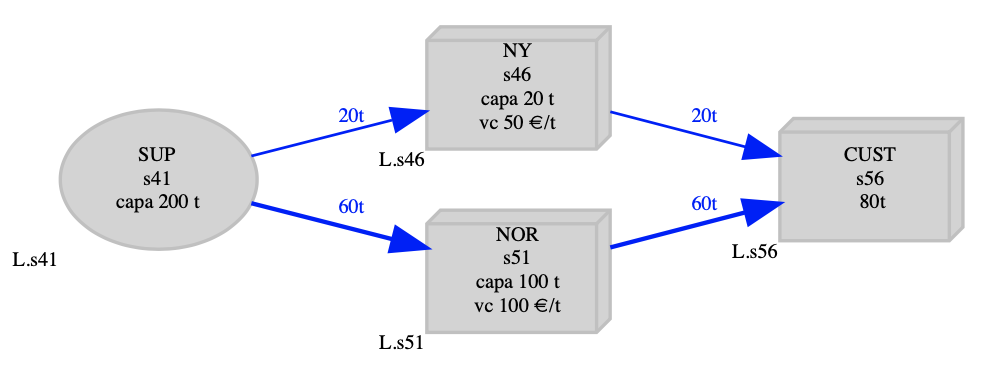 </div>

# Results

There are three ways to get the result of an optimization .

### As a Summary

You use the methods 

- successful():  True if optimizer could find a solution
- iteration(): number of iterations required to find solution
- cost(): minimum network cost under the given constraints


In [5]:
print(f"Optimiziation was{'' if opt.successful() else ' not'} successful,")
print(f"  used {opt.iterations()} iterations")
print(f"  and minimum supply costs are{opt.cost():6.0f} currency units !")

Optimiziation was successful,
  used 4 iterations
  and minimum supply costs are  7000 currency units !


### Details by Nodes & Links as a Pandas DataFrame

To get the details you use method frame() which delivers a pandas dataframe object on return. This object provides the information for each internal variable, i.e. by the number of links between the nodes of your model.

In [6]:
df = opt.frame()
print('Result of Optimization:\n'); print(df)

Result of Optimization:

     Decscription    m(0)    m(1)          m(2)          m(3)
0      Title from     SUP     SUP            NY           NOR
1              to      NY     NOR          CUST          CUST
2       Node from     s41     s41           s46           s51
3              to     s46     s51           s56           s56
4        Supplier     s41     s41           s46           s51
5   Location from   L.s41   L.s41         L.s46         L.s51
6              to   L.s46   L.s51         L.s56         L.s56
7        Activity  Buying  Buying  Distribution  Distribution
8        Material     m40     m40           m40           m40
9    Quantity [t]      20      60            20            60
10    Freight [€]       0       0             0             0
11          [€/t]       0       0             0             0
12    Varcost [€]       0       0          1000          6000
13          [€/t]       0       0            50           100
14    Fixcost [€]       0       0            

### Details by Nodes & Links in Excel

For your convenience the method save() stores the pandas dataframe inside the default data directory or at a place of your choice like

    opt.save( filename='my optimization result', path='/users/xxx/data/')
    
Here we use the default setting, i.e. no parameters.

In [7]:
opt.save()

A file named "Supply Net Math.xlsx" - the name of the model - was created and shown below.


<div> 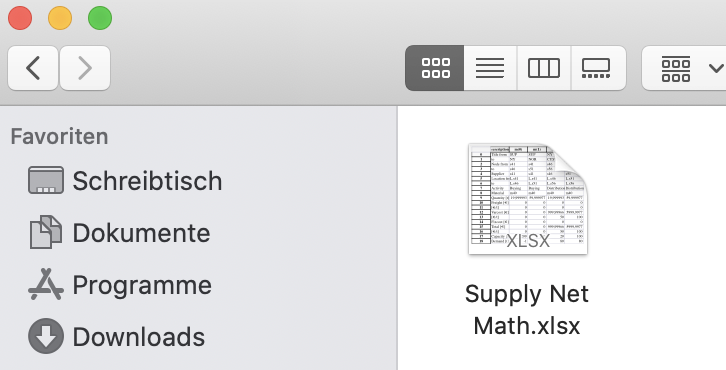 </div>


<div> 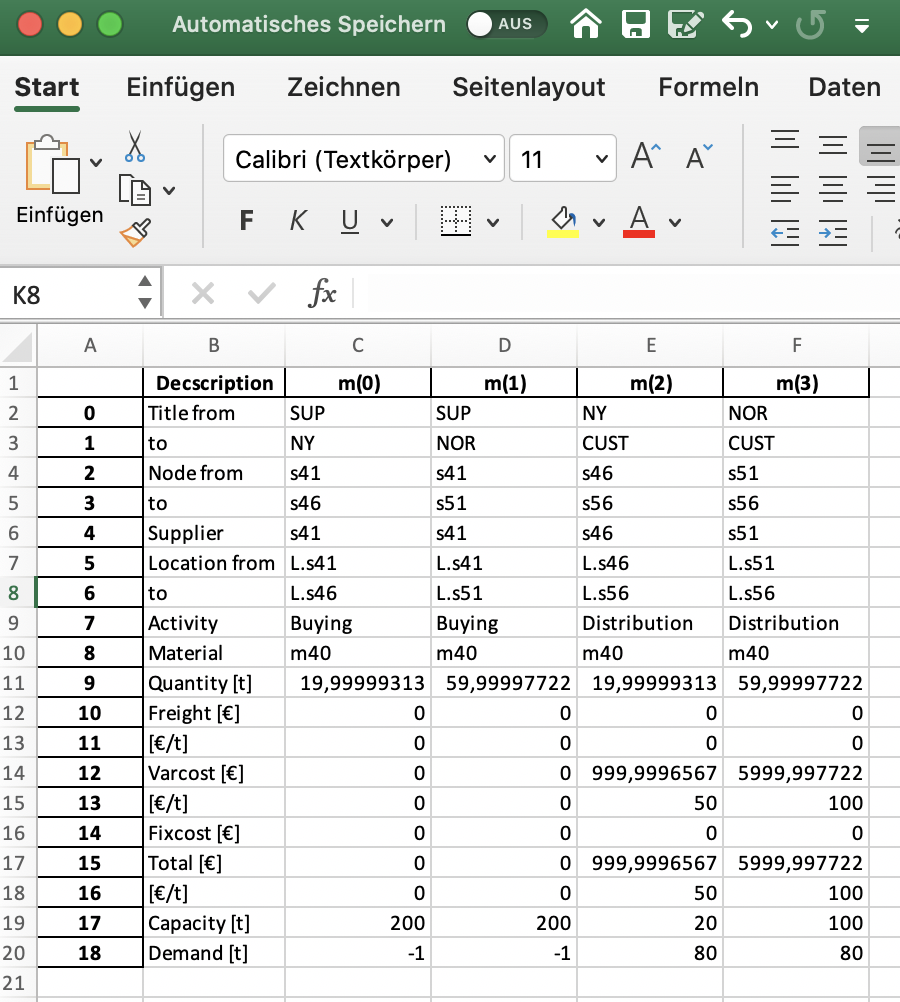 </div>